In [1]:
import numpy as np
from scipy import optimize as opt
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd

1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

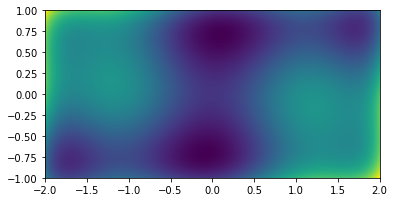

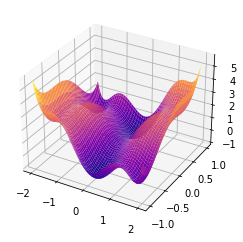

for x0=[0.5,0.5] minimum find in: [-0.08984202  0.7126564 ] 
 with a value of: -1.031628453489877


In [2]:
x = np.linspace(-2, 2,200)
y = np.linspace(-1, 1, 100)
xv, yv = np.meshgrid(x, y)
def f(arg):
    x=arg[0]
    y=arg[1]
    return (4-2.1*x**2+(x**4)/3)*x**2+x*y+(4*y**2-4)*y**2
fxy=(4-2.1*xv**2+(xv**4)/3)*xv**2+xv*yv+(4*yv**2-4)*yv**2

plt.imshow(fxy,extent=(-2,2,-1,1))
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(xv, yv, fxy, cmap="plasma")


plt.show()


x0=[0.5,0.5]
mins=opt.minimize(f,x0)
print("for x0=[0.5,0.5] minimum find in:",mins.x,"\n with a value of:",mins.fun)


In [3]:
mins00=mins=opt.minimize(f,[0,0])
print("\nfor x0=[0,0] minimum find in:",mins00.x,"\n with a value of:",mins00.fun)
print("The methode use by default by minimize is BFGS which is a descending gradient methode. But grad(f)(0,0)=0, so the algorythme doesn't work.")


for x0=[0,0] minimum find in: [0. 0.] 
 with a value of: 0.0
The methode use by default by minimize is BFGS which is a descending gradient methode. But grad(f)(0,0)=0, so the algorythme doesn't work.


2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?


Parameters maximum temp:
 [  5.73581643   2.29443637 132.80950866  15.77931573]

Parameters minimum temp:
 [  6.16452595   1.97590021 260.76390769 -61.3209373 ]


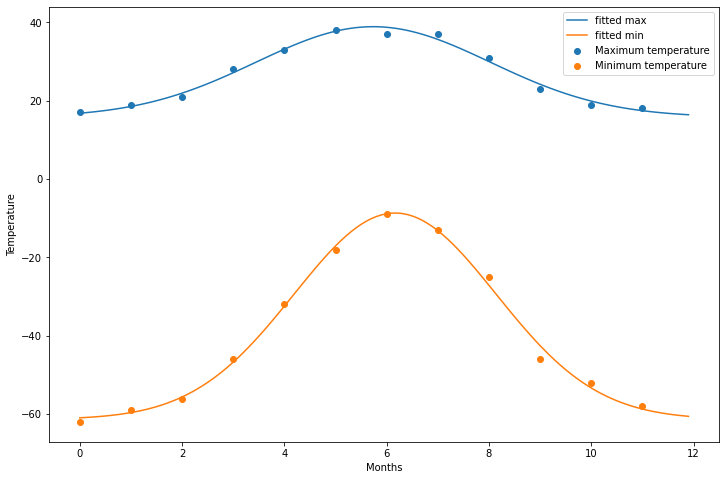

In [4]:
maxs=[17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18]
mins=[-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]
months = np.arange(12)
plt.figure(figsize=(12, 8))
plt.scatter(months, maxs, label='Maximum temperature')
plt.scatter(months, mins, label='Minimum temperature')



def f(x,mu,sigma,a,b):
    return(a*norm.pdf(x,mu,sigma)+b)

popt_maxs, pcov_maxs = opt.curve_fit(f, np.arange(12), maxs, p0=[6,2,20,20], full_output=False)
popt_mins, pcov_mins = opt.curve_fit(f, np.arange(12), mins, p0=[6,2,60,-60], full_output=False)
print("\nParameters maximum temp:\n", popt_maxs)
print("\nParameters minimum temp:\n", popt_mins)

plt.plot(np.arange(start=0,stop=12,step=0.1), f(np.arange(start=0,stop=12,step=0.1), popt_maxs[0], popt_maxs[1],popt_maxs[2],popt_maxs[3]), label='fitted max')
plt.plot(np.arange(start=0,stop=12,step=0.1), f(np.arange(start=0,stop=12,step=0.1), popt_mins[0], popt_mins[1],popt_mins[2],popt_mins[3]), label='fitted min')
plt.xlabel("Months")
plt.ylabel("Temperature")
plt.legend()
plt.show()


In [5]:
ssr = np.sum((f(np.arange(12),popt_mins[0],popt_mins[1],popt_mins[2],popt_mins[3])-mins)**2)
tss = np.sum((np.mean(mins) - mins)**2)
rsq = 1 - ssr / tss
print("For minima we have: RSQ=",rsq)

ssr = np.sum((f(np.arange(12),popt_maxs[0],popt_maxs[1],popt_maxs[2],popt_maxs[3])-maxs)**2)
tss = np.sum((np.mean(maxs) - maxs)**2)
rsq = 1 - ssr / tss
print("For maxima we have: RSQ=",rsq)
print("Both RSQ>98% so the fit is reasonable.")

For minima we have: RSQ= 0.994604193639724
For maxima we have: RSQ= 0.9858796078356873
Both RSQ>98% so the fit is reasonable.


In [6]:
print("Time offset for maxs %.2f +- %.2f" % (popt_maxs[0], np.sqrt(pcov_maxs[0,0])))
print("Time offset for mins %.2f +- %.2f" % (popt_mins[0], np.sqrt(pcov_mins[0,0])))
print("Even considering the fit accuracy, the time offset for min and max temperatures are not the same")

Time offset for maxs 5.74 +- 0.08
Time offset for mins 6.16 +- 0.05
Even considering the fit accuracy, the time offset for min and max temperatures are not the same


3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

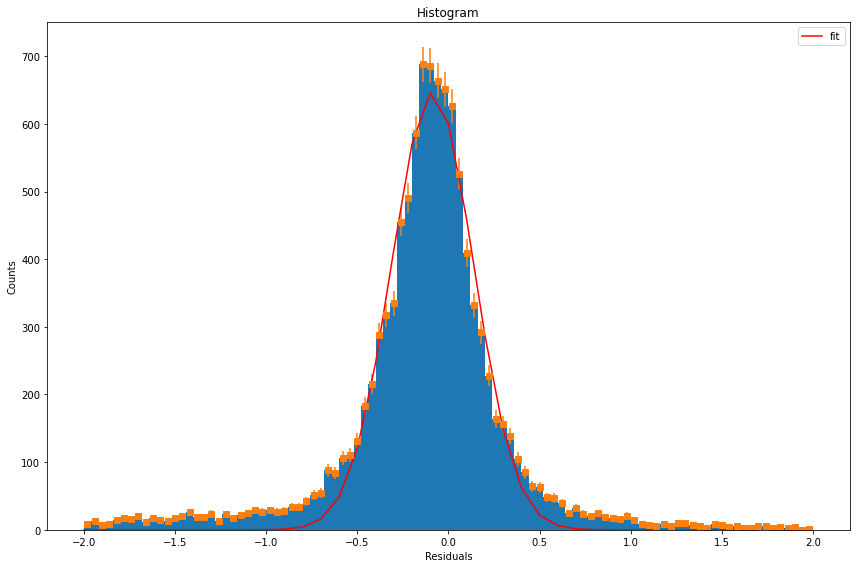

In [7]:
data=np.load('data/residuals_261.pkl',allow_pickle=True)
df=pd.DataFrame(data.item())
df = df[abs(df['residuals'])<2]


fig, ax = plt.subplots(figsize=(12, 8))

y, bins, patches = plt.hist(df['residuals'], bins=100,range=(-2, 2)) 
binwidth=bins[1]-bins[0]
bins=bins[:len(bins)-1]

ax.set_title('Histogram')
ax.set_xlabel('Residuals')
ax.set_ylabel('Counts')
ax.errorbar(bins+binwidth/2, y, yerr=np.sqrt(y), marker='s', linestyle='None')

def f(x,mu,sigma,a):
    return(a*norm.pdf(x,mu,sigma))

popt, _ = opt.curve_fit(f, bins+binwidth/2, y, p0=[0,2,600], full_output=False)
ax.plot(np.arange(start=-2,stop=2,step=0.1), f(np.arange(start=-2,stop=2,step=0.1), popt[0], popt[1],popt[2]), label='fit',c='red')
ax.legend()
fig.tight_layout()

In [8]:
import scipy

ndof = len(y) - 1
print("n degrees of freedom =", ndof)
# calculate the chi^2
err_y=np.sqrt(y)
err_y[err_y == 0] = 1 #avoid divinding by 0
chi2 = np.sum((y - f(bins+binwidth/2, popt[0], popt[1], popt[2]))**2 / err_y)
print("chi2 =", chi2)
# calculate the p-value from the chi^2, the n.d.o.f., and the comulative chi^2 distribution
pvalue = 1. - scipy.stats.chi2.cdf(chi2, ndof)
print("p-value =", pvalue) # if the p-value is < 0.05, the fit is considered unsatisfactory

print("\np-value < 0.05, so the fit should be considered as not satisfactory")

n degrees of freedom = 99
chi2 = 8168.805928101883
p-value = 0.0

p-value < 0.05, so the fit should be considered as not satisfactory


4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

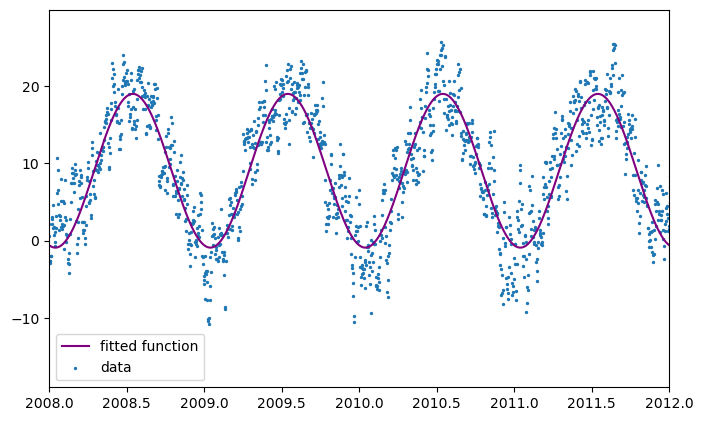


Best-fit values of the parameters for f: [9.95518356 2.88862794 9.04084545]
The average temperature in Munich is given by the parameter c: 9.04084545219327 

The typical daily average value predicted by the model for the coldest days of the year in Munich is given by -a+c: -0.9143381063519058 

The typical daily average value predicted by the model for the hottest days of the year in Munich is given by a+c: 18.996029010738447 

Parameter b is a shift in the argument of the cosine. It make the model able not to start by an extremum value (because cos(0)=1)



In [9]:
def f(t,a,b,c):
    return a * np.cos(2*np.pi*t + b) + c


data = pd.read_csv('data/munich_temperatures_average_with_bad_data.txt', sep=" ", header=None)
data.columns = ["Year", "Temperature"]
data = data.drop(data[data['Temperature'] == 99.].index).reset_index() #clearing data from bad samples
data = data.drop(data[data['Temperature'] == -99.].index).reset_index()


popt, _ = opt.curve_fit(f, data["Year"],data["Temperature"], p0=[9,3,12], full_output=False)

fig = plt.figure(figsize=(8,5))
fig.set_dpi(100)
ax1 = fig.add_subplot(111)
ax1.scatter(data["Year"], data["Temperature"], s=2, label='data')
ax1.plot(data["Year"], f(data["Year"], popt[0], popt[1],popt[2]), label='fitted function',color='purple')
ax1.legend()
ax1.set_xlim([2008,2012])
plt.show()

print("\nBest-fit values of the parameters for f:", popt)

print("The average temperature in Munich is given by the parameter c:",popt[2],"\n")
print("The typical daily average value predicted by the model for the coldest days of the year in Munich is given by -a+c:",-popt[0]+popt[2],"\n")
print("The typical daily average value predicted by the model for the hottest days of the year in Munich is given by a+c:",popt[0]+popt[2],"\n")
print("Parameter b is a shift in the argument of the cosine. It make the model able not to start by an extremum value (because cos(0)=1)\n")

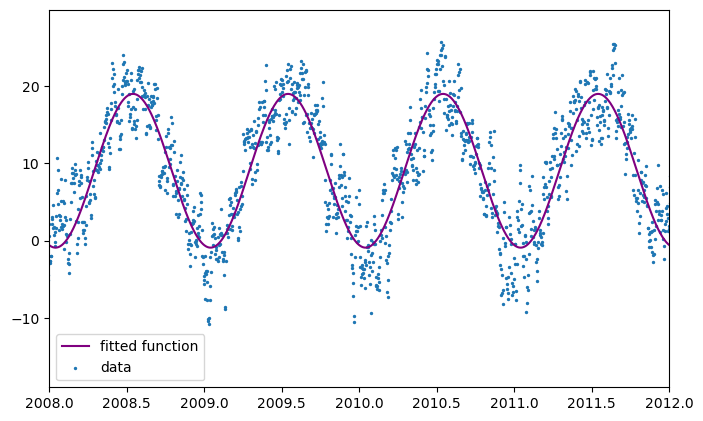


Best-fit values of the parameters for g: [9.95518356 2.88862794 9.04084545] 


SSR f: 95529.06253319701
SSR g: 95508.33748279548 

CL: 0.231 , additional parameter necessary: NO


In [10]:
def g(t,a,b,c,d):
    return a * np.cos(2*np.pi*t*b + c) + d

poptg, _ = opt.curve_fit(g, data["Year"],data["Temperature"], p0=[9,1,3,12], full_output=False)

fig = plt.figure(figsize=(8,5))
fig.set_dpi(100)
ax1 = fig.add_subplot(111)
ax1.scatter(data["Year"], data["Temperature"], s=2, label='data')
ax1.plot(data["Year"], g(data["Year"], poptg[0], poptg[1],poptg[2],poptg[3]), label='fitted function',color='purple')
ax1.legend()
ax1.set_xlim([2008,2012])
plt.show()

print("\nBest-fit values of the parameters for g:", popt,"\n")


SSR_f = np.sum((f(data["Year"], popt[0], popt[1],popt[2]) - data["Temperature"])**2)
SSR_g = np.sum((g(data["Year"], poptg[0], poptg[1],poptg[2],poptg[3]) - data["Temperature"])**2)
print("\nSSR f:", SSR_f,)
print("SSR g:", SSR_g, "\n")

# function presented in lecture 08

from scipy.stats import f

def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=True):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    CL = 1. - f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("CL: %.3f" % CL, ", additional parameter necessary:", "YES" if CL < 0.10 else "NO")
    return CL

cl_func_vs_g=Ftest(SSR_f, SSR_g, 3,4, len(data["Year"]))